Agente 1 
1


ValueError: Unrecognized marker style X

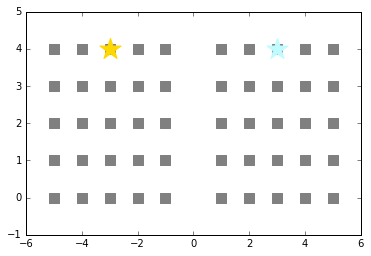

In [2]:
%matplotlib inline
import time
import random
import pylab as pl
from IPython import display
from itertools import compress
import numpy as np


#Tamaño del tamblero
tam = 5
#Colores de los jugadores
ganar = 10
puntaje = [0,0]
turnos = 30
colors = ["#ffc0f7","red"]

#Parametros de la grafica
xmax = tam + tam/2
xmin = -tam - tam/2
ymax = tam-1 + 0.5
ymin = -0.5
pl.xlim(xmin, xmax)
pl.ylim(ymin, ymax)

#Tamaño de los cuadrados
size = (1)**(2)

class Tablero:
    def __init__(self,name,jugador):
        self.__name = name
        self.__estrellita = np.random.randint(tam**2)
        self.__tablero = np.zeros((tam,tam))
        self.__jugador = jugador
        indices = Pos1Dto2D(self.__estrellita-1,tam)
        self.__tablero[indices[0],indices[1]]=1
        if jugador == 1:
            self.InitPos1()
        else:
            self.InitPos2()
    def InitPos2(self):
        x1 = list(range(1,tam+1))
        for i in range(tam-1):
            x_aux1 = x1[-tam:]
            x1 = x1 + x_aux1
        y1 = []
        cont = tam-1
        for i in range(tam):
            for j in range(tam):
                y1 = y1 + [cont]
            cont -= 1
        self.x = x1
        self.y = y1
    def InitPos1(self):
        x2 = list(range(-tam,0))
        for i in range(tam-1):
            x_aux2 = x2[-tam:]
            x2 = x2 + x_aux2
        y2 = []
        cont = tam-1
        for i in range(tam):
            for j in range(tam):
                y2 = y2 + [cont]
            cont -= 1
        self.x = x2
        self.y = y2
    def PosEstrellita(self):
        return self.__estrellita
    def Jugador(self):
        return self.__jugador
    def DistanciaEstrellita(self,pos):
        pos = Pos1Dto2D(pos-1,tam)
        posEstrellita = np.nonzero(self.__tablero)
        return (abs(pos[0]-posEstrellita[0])+abs(pos[1]-posEstrellita[1]))[0]
    def __ActualizarTablero(self):
        self.__tablero = np.zeros((tam,tam))
        indices = Pos1Dto2D(self.__estrellita,tam)
        self.__tablero[indices[0],indices[1]]=1
    def Mover(self,direccion):
        ind = list(Pos1Dto2D(self.__estrellita,tam))
        if direccion == 1:
            ind[0] -= 1
            if ind[0] >= 0:
                self.__estrellita = Pos2Dto1D(ind[0],ind[1],tam)
        elif direccion == 3:
            ind[0] += 1
            if ind[0] < tam:
                self.__estrellita = Pos2Dto1D(ind[0],ind[1],tam)
        elif direccion == 4:
            ind[1] -= 1
            if ind[1] >= 0:
                self.__estrellita = Pos2Dto1D(ind[0],ind[1],tam)
        elif direccion == 2:
            ind[1] += 1
            if ind[1] < tam:
                self.__estrellita = Pos2Dto1D(ind[0],ind[1],tam)
        self.__ActualizarTablero()
        return self.__estrellita
    def Disparo(self,pos):
        if pos-1 == self.__estrellita:
            return 1
        else:
            return 0
    
class Sensor:
    def __init__(self):
        self.__P = [[0.70, 0.15, 0.1, 0.05],
                    [0.17, 0.6, 0.17, 0.06],
                    [0.06, 0.17, 0.6, 0.17],
                    [0.05, 0.12, 0.23, 0.6],
                    [0.05, 0.1, 0.15, 0.8]]
        self.__colors = ["verde", "amarillo", "anaranjado", "rojo"]
        self.colorsG = {"verde":"g", "amarillo":"#fff46f", "anaranjado":"#ff8b00", "rojo":"r"}
    def Sensar(self,dist):
        if dist > 4:
            dist = 4
        probs = self.__P[dist]
        alea = np.random.rand(1)[0]
        cont = 0
        while alea > 0:
            color = self.__colors[cont]
            alea -= probs[cont]
            cont += 1
        return color
    
def Pos2Dto1D(posX,posY,n):
    #pos inicia en 0
    pos1D = posX*n+posY
    return pos1D
def Pos1Dto2D(pos,n):
    indices = np.unravel_index(pos, (n,n))
    return indices
def UnoPorDim(mat,dim):
    maximos = mat.max(axis=dim)
    if np.sum(maximos) == tam:
        return True
    else:
        return False
    
#AGENTE DE PRUEBA
def Agente(a,b,c,d):
    acc = np.random.randint(3)+1
    if acc == 3:
        param = np.random.randint(4)+1
    else:
        param = np.random.randint(25)+1
    return acc, param


#AGENTES DE LOS ESTUDIANTES
    
    
#Ciclo general del juego, debera ser un while mientras nadie haya ganado o 121 iteraciones
jugadorActual = 1 #inicializacion del jugador
tableros = [Tablero("tablero1",1), Tablero("tablero2",2)]
sensor = Sensor()
resultado_accion = [None,None]
accion_oponente = [[None,None,None],[None,None,None]]
for i in range(turnos*2):

    #ASI VA A SER COMO SE LLAMA AL AGENTE DE CADA UNO
    if jugadorActual == 1:
        print("Agente",jugadorActual,"")
        start = time.time()

         #Para efectos del ejemplo genera una accion aleatoria, esta puede repetir lugar porque esta comentada la parte que lo chequea

        [tipoAccion, parametroAccion] = Agente(jugadorActual, resultado_accion[jugadorActual-1], accion_oponente[jugadorActual%2], tableros[jugadorActual-1].PosEstrellita())
        
        print(tipoAccion)
        end = time.time()
        
    else:
        print("Agente",jugadorActual,"")
        start = time.time()

         #Para efectos del ejemplo genera una accion aleatoria, esta puede repetir lugar porque esta comentada la parte que lo chequea

        [tipoAccion, parametroAccion] = Agente(jugadorActual, resultado_accion[jugadorActual-1], accion_oponente[jugadorActual%2], tableros[jugadorActual-1].PosEstrellita())
        
        print(tipoAccion)
        end = time.time()
    
    
    #Actualizacion del estado del tablero
    if tipoAccion == 1:
        puntos = tableros[jugadorActual%2].Disparo(parametroAccion)
        resultado_accion[jugadorActual-1] = puntos
        puntaje[jugadorActual-1] += puntos
        accion_oponente[jugadorActual%2] = [tipoAccion, parametroAccion, puntos]
        
            #Actualizacion del grafico
        pl.cla()
        pl.scatter(tableros[jugadorActual-1].x,tableros[jugadorActual-1].y, marker='s', s=size*100, color='grey')
        pl.scatter(tableros[jugadorActual%2].x,tableros[jugadorActual%2].y, marker='s', s=size*100, color='grey')
        pl.scatter(tableros[0].x[tableros[0].PosEstrellita()],tableros[0].y[tableros[0].PosEstrellita()], marker='*', s=size*500, color='#ffd800')
        pl.scatter(tableros[1].x[tableros[1].PosEstrellita()],tableros[1].y[tableros[1].PosEstrellita()], marker='*', s=size*500, color='#c0fcff')
        pl.scatter(tableros[jugadorActual%2].x[parametroAccion-1],tableros[jugadorActual%2].y[parametroAccion-1], marker='X', s=size*450, color=colors[puntos])
        display.clear_output(wait=True)
        display.display(pl.gcf())
        print("Tiempo Agente",jugadorActual," :",end - start)
        
    elif tipoAccion == 2:
        dist = tableros[jugadorActual%2].DistanciaEstrellita(parametroAccion)
        colorSens = sensor.Sensar(dist)
        resultado_accion[jugadorActual-1] = colorSens
        accion_oponente[jugadorActual%2] = [tipoAccion, parametroAccion, colorSens]
        
        #Actualizacion del grafico
        pl.cla()
        pl.scatter(tableros[jugadorActual-1].x,tableros[jugadorActual-1].y, marker='s', s=size*100, color='grey')
        pl.scatter(tableros[jugadorActual%2].x,tableros[jugadorActual%2].y, marker='s', s=size*100, color='grey')
        pl.scatter(tableros[0].x[tableros[0].PosEstrellita()],tableros[0].y[tableros[0].PosEstrellita()], marker='*', s=size*500, color='#ffd800')
        pl.scatter(tableros[1].x[tableros[1].PosEstrellita()],tableros[1].y[tableros[1].PosEstrellita()], marker='*', s=size*500, color='#c0fcff')
        pl.scatter(tableros[jugadorActual%2].x[parametroAccion-1],tableros[jugadorActual%2].y[parametroAccion-1], marker='o', s=size*450, color=sensor.colorsG[colorSens])
        display.clear_output(wait=True)
        display.display(pl.gcf())
        print("Tiempo Agente",jugadorActual," :",end - start)
        
    elif tipoAccion == 3:
        tableros[jugadorActual-1].Mover(parametroAccion)
        resultado_accion[jugadorActual-1] = None
        accion_oponente[jugadorActual%2] = [tipoAccion, parametroAccion, None]
        
        pl.cla()
        pl.scatter(tableros[jugadorActual-1].x,tableros[jugadorActual-1].y, marker='s', s=size*100, color='grey')
        pl.scatter(tableros[jugadorActual%2].x,tableros[jugadorActual%2].y, marker='s', s=size*100, color='grey')
        pl.scatter(tableros[0].x[tableros[0].PosEstrellita()],tableros[0].y[tableros[0].PosEstrellita()], marker='*', s=size*500, color='#ffd800')
        pl.scatter(tableros[1].x[tableros[1].PosEstrellita()],tableros[1].y[tableros[1].PosEstrellita()], marker='*', s=size*500, color='#c0fcff')
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        print("Tiempo Agente",jugadorActual," :",end - start)
    
    print("TURNO: ",i)
    print(accion_oponente)
    time.sleep(1)


    #ACA SE CHEQUEARIA SI ALGUIEN GANO
    if jugadorActual == 1:
        if puntaje[0] >= ganar:
            print("GANO JUGADOR 1")
    else:
        if puntaje[1] >= ganar:
            print("GANO JUGADOR 2")

    #Cambio de jugados
    if (i+1)%2 == 0:
        jugadorActual = 1
    else:
        jugadorActual = 2
print("PUNTAJE FINAL: ", puntaje)